/var/folders/tw/j68gkt955z57h83crjdjjrg80000gr/T/ipykernel_90297/1465796525.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(inputs_[:, 0], inputs_[:, 1], c=labels, cmap=matplotlib.cm.get_cmap('RdYlBu'))


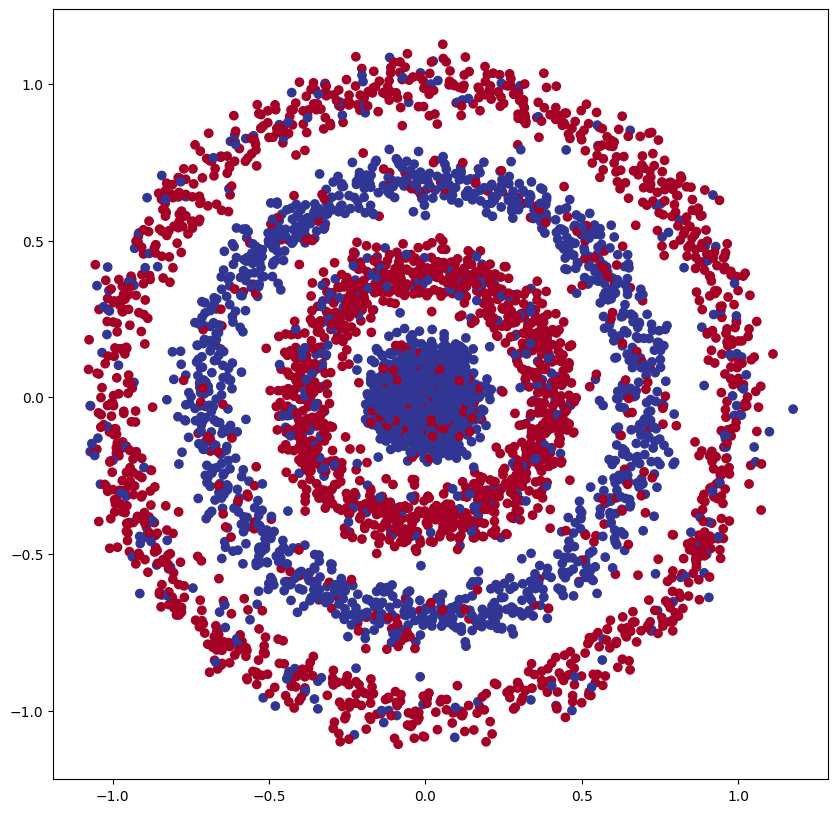

In [1]:
import os, sys, numpy, torch, matplotlib.pyplot, matplotlib.cm

sys.path += [os.path.abspath(os.path.join('..')), os.path.abspath(os.path.join('../..'))]  # Allow repository modules to be imported

from settings.concentric_spheres import get_dataloader
from utils.optimization import initialize

experiment = {
    'seed': 1234,
    'classes': 2,
    'input_dimension': 100, 
    'spheres_dimension': 2, 
    'spheres': 4, 
    'sample_size': 5000, 
    'batch_size': 50, 
    'margin': 0.3, 
    'noise_std': .05,
    'epochs': 10000,
    'learning_rate': 0.01,
    'initial_hidden_units': 2,
    'initial_depth': 2,
    'bias': True,
    'convergence_epsilon': 0.0001,
    'target_accuracy': .85
}

device, generator = initialize(experiment['seed'])
train_data, rotation_matrix = get_dataloader(**experiment, label_flipping=1. - experiment['target_accuracy'], generator=generator)
test_data = get_dataloader(**experiment, rotation_matrix=rotation_matrix, generator=generator)
inputs = []; labels = []
for batch_inputs, batch_labels in train_data: inputs.append(batch_inputs); labels.append(batch_labels)
inputs, labels = torch.concatenate(inputs), torch.concatenate(labels)

fig, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
inputs_ = numpy.matmul(inputs.detach().cpu().numpy(), rotation_matrix.transpose())
ax.scatter(inputs_[:, 0], inputs_[:, 1], c=labels, cmap=matplotlib.cm.get_cmap('RdYlBu'))

In [2]:
import ipycanvas

training_canvas, growth_metrics_canvas, input_domain_canvas = ipycanvas.Canvas(), ipycanvas.Canvas(), ipycanvas.Canvas()
training_canvas.width, training_canvas.height = 1200, 600
growth_metrics_canvas.width = 1200; growth_metrics_canvas.height = 400
input_domain_canvas.width = input_domain_canvas.height = 800
training_canvas.font = growth_metrics_canvas.font = input_domain_canvas.font = "30px arial"
args = ('Results will appear as processed', training_canvas.width / 4, training_canvas.height / 3)
training_canvas.fill_text(*args); growth_metrics_canvas.fill_text(*args); input_domain_canvas.fill_text(*args)

In [3]:
training_canvas

Canvas(height=600, width=1200)

In [4]:
growth_metrics_canvas

Canvas(height=400, width=1200)

In [5]:
input_domain_canvas

Canvas(height=800, width=800)

In [6]:
from functools import partial
from plots import plot_train_loss_and_accuracy, plot_model_metrics, plot_samples_activation_hyperplanes
from growing_fully_connected_neural_network import GrowingFullyConnectedNeuralNetwork
from experiment import execute_experiment

plot_train_loss_and_accuracy = partial(plot_train_loss_and_accuracy, canvas=training_canvas)
plot_model_metrics = partial(plot_model_metrics, canvas=growth_metrics_canvas)
plot_samples_activation_hyperplanes = partial(plot_samples_activation_hyperplanes, canvas=input_domain_canvas,
                                              rotation_matrix=rotation_matrix, dataloader=train_data)

execute_experiment(
    **experiment,
    experiment_name_parameters=['seed', 'batch_size', 'sample_size', 'convergence_epsilon'],
    train_data=train_data, 
    test_data=test_data, 
    model_class=GrowingFullyConnectedNeuralNetwork,
    growing_epochs_interval=1,
    saving_epochs_interval=1000,
    callbacks_epochs_interval=100,
    callbacks=[plot_train_loss_and_accuracy, plot_model_metrics, plot_samples_activation_hyperplanes]
)


Convergence achieve according to convergence_epsilon = 0.0001
Width growth: Two unit with opposing signs were added to layer 0 which now has 4 units
Convergence achieve according to convergence_epsilon = 0.0001


AttributeError: 'GrowingFullyConnectedNeuralNetwork' object has no attribute 'target_accuracy'